In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import random

In [2]:
class Board:
    def __init__(self, n, mat=None):
        self.n = n
        if mat == None:
            mat = [-1 for _ in range(n)]
        self.mat = mat
        
    def placequeen(self, r, c):
        self.mat[c] = r
    
    def incol(self, c):
        return self.mat[c]
    
    def removequeen(self, c):
        self.mat[c] = -1
        
    def randomize(self):
        self.mat = [random.randint(0, self.n-1) for _ in range(self.n)]
    
    def printboard(self):
        cell = np.ones((143, 143)) * 0.4375
        
        queen1 = Image.open('queencell1.png')
        queen1 = np.asarray(queen1) / 255
        queen1 = queen1[:,:,0]
        queen2 = Image.open('queencell2.png')
        queen2 = np.asarray(queen2) / 255
        queen2 = queen2[:,:,0]
        
        image = np.ones((self.n*143, self.n*143))
        
        for i in range(self.n):
            for j in range(self.n):
                if (i+j) % 2 == 0:
                    image[i*143:(i+1)*143, j*143:(j+1)*143] = cell.copy()
                
                if self.mat[j] == i:
                    if (i+j) % 2 == 0:
                        image[i*143:(i+1)*143, j*143:(j+1)*143] = queen2.copy()
                    else:
                        image[i*143:(i+1)*143, j*143:(j+1)*143] = queen1.copy()
    
        plt.imshow(image, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
    def getcopy(self):
        n = self.n
        matrix = [r for r in self.mat]
        return Board(n, matrix)  
    
    def heuristic(self):
        attacks = 0
        
        for col in range(self.n):
            row = self.mat[col]
            
            for i in range(col+1, self.n):
                if self.mat[i] == row:
                    attacks += 1
            
            i, j = row+1, col+1
            while i < self.n and j < self.n:
                if self.mat[j] == i:
                    attacks += 1
                i += 1
                j += 1
                
            i, j = row-1, col+1
            while i >= 0 and j < self.n:
                if self.mat[j] == i:
                    attacks += 1
                i -= 1
                j += 1
            
        return attacks

In [3]:
class PQueue:
    def __init__(self):
        self.queue = []
        
    def isEmpty(self):
        return len(self.queue) == 0
    
    def enqueue(self, ele, pri):
        self.queue.append((ele, pri))
    
    def dequeuemin(self):
        if self.isEmpty():
            return None, None
        
        self.queue.sort(key=lambda x:x[1])
        
        ele, pri = self.queue.pop(0)
        
        return ele, pri
    
    def dequeuemax(self):
        if self.isEmpty():
            return None, None
        
        self.queue.sort(key=lambda x:x[1])
        
        ele, pri = self.queue.pop(-1)
        
        return ele, pri

In [4]:
def hillclimbsearch(n):
    curr = Board(n)
    curr.randomize()
    currheu = curr.heuristic()

    count = 0
    
    while True:
        q = PQueue()
        
        for col in range(curr.n):
            row = curr.incol(col)
            curr.removequeen(col)
            
            for i in range(curr.n):
                if i != row:
                    curr.placequeen(i, col)
                    q.enqueue(curr.getcopy(), curr.heuristic())
                    curr.removequeen(col)
                    
            curr.placequeen(row, col)
        
        child , heu = q.dequeuemin()
        
        if heu == 0:
            return child
        elif heu == currheu:
            count += 1
            if count > 100:
                return hillclimbsearch(n)
        elif heu < currheu:
            curr = child
            currheu = heu
        else:
            return curr
            
        curr = child
        currheu = heu

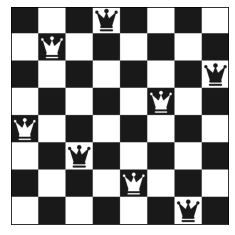

In [5]:
b = hillclimbsearch(8)
b.printboard()